In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline 

# General Examination of Dataset

The goal is to make sure the data is ok to work with for analysis. You want to   

**1) Inspect any values that are missing or values that don't make sense and either drop or replace them**   

**2) Deduplicate your data. Inspect your duplicate entries and decide how to handle them (drop, replace, combine, etc). However you decide, you should not have two or more entries where one will suffice.** 

**3) Make sure your data is the correct data type for the analysis**   

**4) Use .value_counts() to try and catch invalid values in your data set. It's impractical to observe every datapoint, but this helps to catch many of the obviously wrong ones.**    


- Use ``.info()`` to observe data types and if there is missing data nan. This can be done by observing the second row of the result and comparing it to the results of each column. The difference between these two numbers are the number of missing values you have. It is also important to observe what type of data each column is and prepare to change it to the correct type for analysis (for example, sometimes numbers are recorded as strings. You want these to be converted to ints or floats to use mathematical functions on them).


- You can also use df.isna().sum() to observe how many values in each column you have that are not a number.     


- df.describe() can give some quick statistics about each column although, you want your data to be in the correct format before doing this.     


- A good way to inspect columns for weird values is with the .value_counts() method. Use ``df['Column_Name'].value_counts()`` to inspect

In [2]:
cwd = os.getcwd()

In [3]:
list_of_data = os.listdir(cwd +'/SalesAnalysis/Sales_Data/')

In [4]:
path_to_data = cwd +'/SalesAnalysis/Sales_Data/'

In [5]:
dataframes = [pd.read_csv(path_to_data+x) for x in list_of_data]

In [6]:
df = pd.concat(dataframes)

In [7]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


In [9]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 13621
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


# Data set cleaned
Though there could be incorrect values still in there. You will just have to keep an eye out from here on. For example, you may see a macbook pro price in there written as 17.00. That data point does not seem correct, and judging by the first entry in df, it's likely been misentered and should be 1700. It's random stuff like this to watch out for. It's impractical to personally view every datapoint, but do what you can when you see it. 

# Converting Data Types
Order ID, Product, and Purchase Address are fine to keep as strings.  


We want to convert Quantity Ordered and Price Each to ints and floats respectively.  


And we want to convert Order Date to a Date-Time Object.

In [14]:
df.astype({'Quantity Ordered': 'int64', 'Price Each':'float', 'Order Date': 'datetime'})

ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

In [15]:
df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

# Here's a good example
In carrying on with converting data types, we see that our dataset is acutually not clean. There are 355 entries of "Quantity Ordered" rather than a number in our Quantity Ordered column. We're likely going to drop them, but first an examination of it.

In [16]:
df[df['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10443,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10784,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10813,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11047,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# Aha. There's a whole bunch of them like this.

Some ways to handle this that come to mind are:

1) Grab the indices where these values occur and drop them

2) Reassign the dataframe as ``df = df[df['Quantity Ordered'] != 'Quantity Ordered']``

In [17]:
# 1) 
indices_to_drop = df[df['Quantity Ordered']=='Quantity Ordered'].index
df.drop(indices_to_drop) #inplace not set to true so changes are not saved.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [18]:
# 2)
df2 = df[df['Quantity Ordered'] !='Quantity Ordered']

In [19]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


# These return different data frames. Why is that?

The dataframe we started with had 186305. We had 355 entries we wanted to drop and so we should expect a dataframe with 185950 rows, or the data frame above from method 2). What's up with method 1? Rerunning the program from the top to restore the dataframe as it was before I did method 2, we see that there are duplicate entries for certain indices.

In [20]:
len(indices_to_drop)

355

In [21]:
duplicate_indices = []
for i in range(len(indices_to_drop)):
    if len(df[df.index == indices_to_drop[i]]) > 1:
        duplicate_indices.append(indices_to_drop[i])

In [22]:
len(duplicate_indices)

343

In [23]:
df.loc[duplicate_indices[0], :] # So the indices are repeated BUT they are not the same data. 
# In this situation, it appears that using df = df[df['Quantity Ordered'] != 'Quantity Ordered'] is the way to do here.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,176799,Wired Headphones,1,11.99,04/03/19 14:24,"452 Spruce St, Portland, OR 97035"
254,150744,34in Ultrawide Monitor,1,379.99,02/07/19 13:45,"682 5th St, Atlanta, GA 30301"
254,162248,Wired Headphones,1,11.99,03/14/19 16:03,"685 5th St, San Francisco, CA 94016"
254,236916,Wired Headphones,1,11.99,08/31/19 07:58,"474 Cedar St, Austin, TX 73301"
254,194332,Lightning Charging Cable,1,14.95,05/27/19 15:10,"912 Willow St, San Francisco, CA 94016"
254,279037,Wired Headphones,1,11.99,11/28/19 21:38,"165 Cherry St, San Francisco, CA 94016"
254,259602,AAA Batteries (4-pack),2,2.99,10/09/19 03:13,"594 Lincoln St, Los Angeles, CA 90001"
254,141481,AA Batteries (4-pack),1,3.84,01/26/19 22:19,"118 Church St, New York City, NY 10001"
254,248395,Vareebadd Phone,1,400,09/20/19 19:06,"872 Pine St, New York City, NY 10001"


In [24]:
df = df2

In [25]:
df.duplicated().sum() # There are 618 duplicated rows

264

In [26]:
df.loc[df.duplicated(), :] # Show the duplicated rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
1735,297311,Bose SoundSport Headphones,1,99.99,12/07/19 07:30,"858 Willow St, Los Angeles, CA 90001"
2822,298358,Apple Airpods Headphones,1,150,12/04/19 15:57,"482 8th St, San Francisco, CA 94016"
3131,298657,Lightning Charging Cable,1,14.95,12/01/19 18:22,"428 12th St, Atlanta, GA 30301"
3377,298883,Wired Headphones,1,11.99,12/28/19 18:07,"516 Willow St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
9267,218756,AAA Batteries (4-pack),1,2.99,06/11/19 14:54,"362 Hickory St, Boston, MA 02215"
9538,219007,AA Batteries (4-pack),1,3.84,06/24/19 11:16,"42 8th St, Los Angeles, CA 90001"
10983,220392,Lightning Charging Cable,1,14.95,06/08/19 17:13,"472 8th St, Portland, ME 04101"
11487,220882,Lightning Charging Cable,1,14.95,06/13/19 17:53,"588 Lake St, Boston, MA 02215"


In [27]:
df.drop_duplicates(inplace=True)

<ipython-input-27-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [28]:
df = df.drop_duplicates().copy() # Gets rid of SettingWithCopyWarning.

In [29]:
df.duplicated().sum()

0

# Now to change datatype
Using datetime

In [30]:
df = df.astype({'Quantity Ordered': 'int64', 'Price Each':'float', 'Order Date': 'datetime64'})

In [31]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

# Alright, dataset looks ready to go

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


# What are the best selling items?

In [33]:
df['Product'].value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

# Charging cables, batteries and headphones. 

Text(0, 0.5, 'Count')

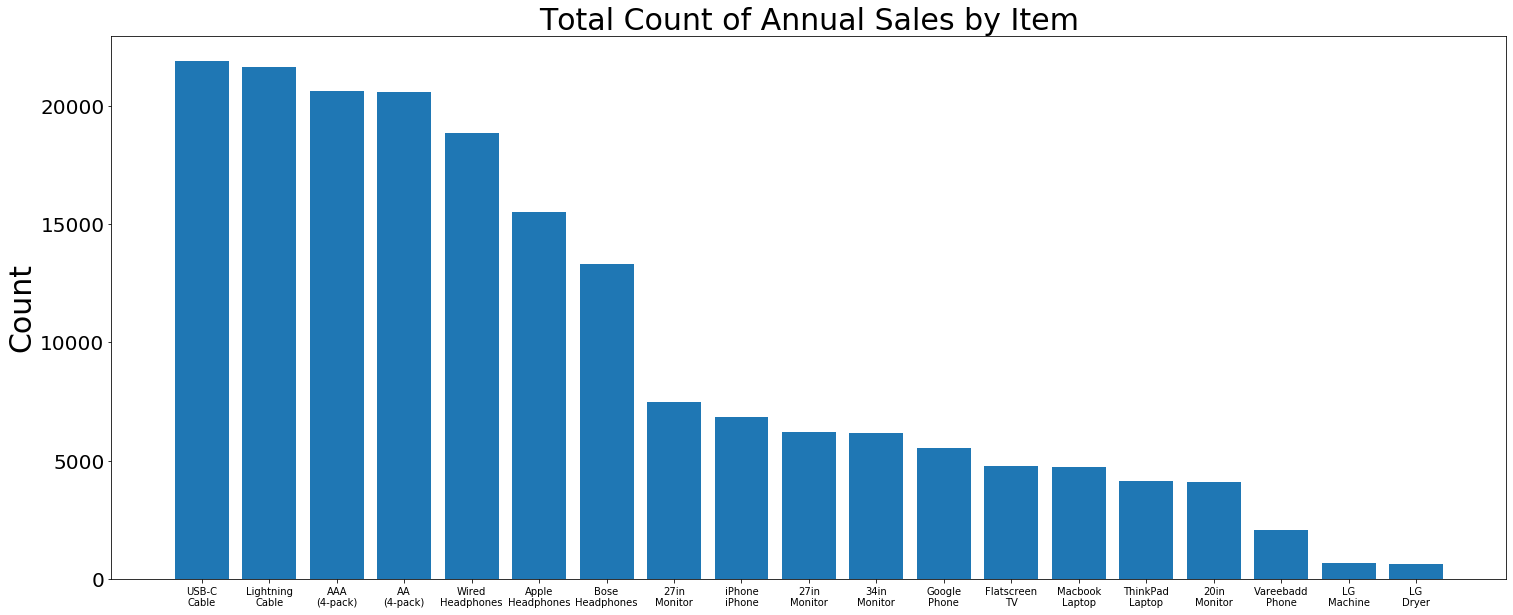

In [34]:
plt.figure(figsize=(25,10))
plt.bar(df['Product'].value_counts().index, df['Product'].value_counts().values)
plt.xticks([str(x) for x in df['Product'].value_counts().index], [ (str(x).split(' ')[0] + '\n' + str(x).split(' ')[-1]) for x in df['Product'].value_counts().index], fontsize=10);
plt.yticks(fontsize=20);
plt.title('Total Count of Annual Sales by Item', fontsize=30)
plt.ylabel('Count', fontsize=30)



# Which month saw the most sales?

In [35]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [36]:
df['Order Date'].dt.month_name().value_counts()

December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: Order Date, dtype: int64

Text(0, 0.5, 'Count')

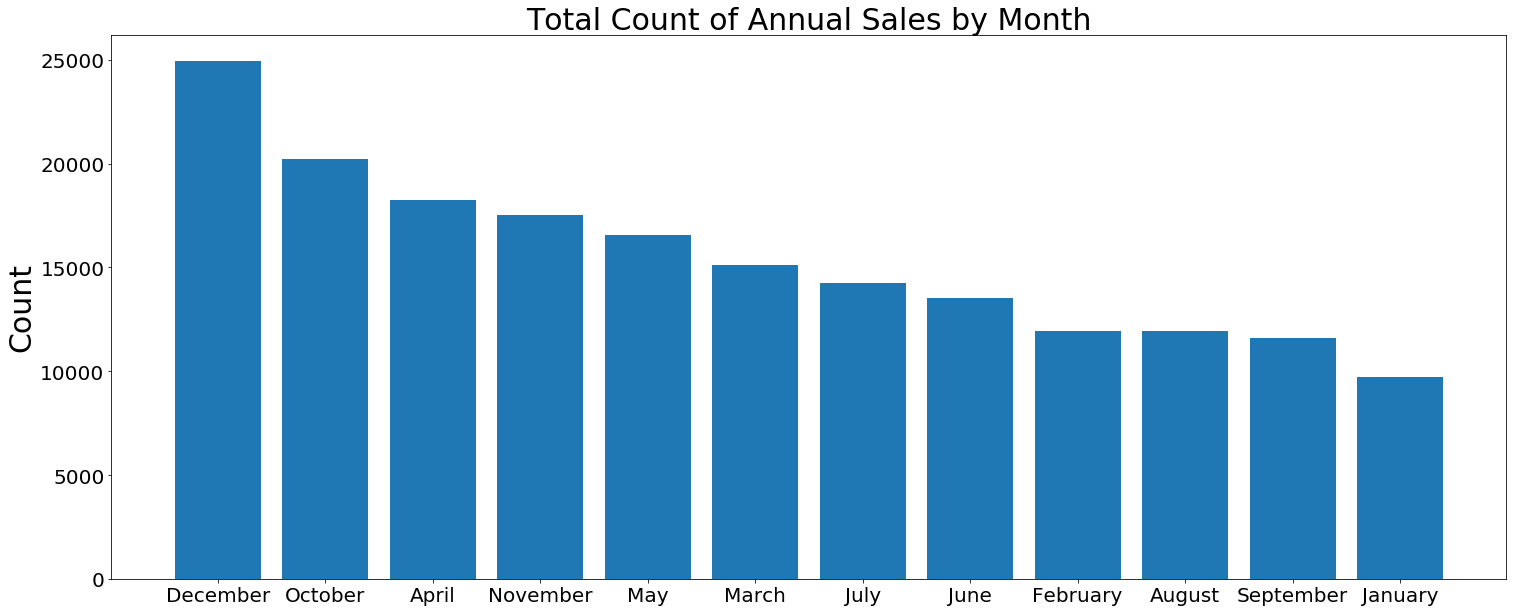

In [37]:
plt.figure(figsize=(25,10))
plt.bar(df['Order Date'].dt.month_name().value_counts().index, df['Order Date'].dt.month_name().value_counts().values)
plt.xticks([str(x) for x in df['Order Date'].dt.month_name().value_counts().index], [ (str(x).split(' ')[0]) for x in df['Order Date'].dt.month_name().value_counts().index], fontsize=20);
plt.yticks(fontsize=20);
plt.title('Total Count of Annual Sales by Month', fontsize=30)
plt.ylabel('Count', fontsize=30)

# December had the most number of sales, followed by October, April, and November

# Looking at Profits by item

In [40]:
list_of_products = list(df['Product'].value_counts().index)
list_of_products

['USB-C Charging Cable',
 'Lightning Charging Cable',
 'AAA Batteries (4-pack)',
 'AA Batteries (4-pack)',
 'Wired Headphones',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 '27in FHD Monitor',
 'iPhone',
 '27in 4K Gaming Monitor',
 '34in Ultrawide Monitor',
 'Google Phone',
 'Flatscreen TV',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 '20in Monitor',
 'Vareebadd Phone',
 'LG Washing Machine',
 'LG Dryer']

In [44]:
total_profit = []

for product in list_of_products:
    df.loc[df['Product']==product, 'Price Each'] * df.loc[df['Product']==product, 'Quantity Ordered'].values